In [1]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

./Example-TFDF_with_house_price_predicting.ipynb
./test.csv
./submission.csv
./data_description.txt
./预处理流程-House_Price+++Comprehensive data exploration with Python.txt
./House_Price+++Comprehensive data exploration with Python.ipynb
./train.csv
./sample_submission.csv
./.ipynb_checkpoints/Example-TFDF_with_house_price_predicting-checkpoint.ipynb
./.ipynb_checkpoints/House_Price+++Comprehensive data exploration with Python-checkpoint.ipynb


In [2]:
import tensorflow_decision_forests as tfdf
import pandas as pd

dataset = pd.read_csv("./train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.15.0
TensorFlow Decision Forests v1.8.1


In [5]:
dataset_df = pd.read_csv("./train.csv")
print(f"Full train dateset shape is {dataset_df.shape}")

Full train dateset shape is (1460, 81)


In [6]:
dataset_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
dataset_df = dataset_df.drop("Id",axis=1)
dataset_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## House Price Distribution
Now let us take a look at how the house prices are distributed

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/k0/sqlrb6tx7w77mv29j7333kyh0000gq/T/ipykernel_59160/3115628176.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['SalePrice'],color='g',bins=100,hist_kws={'alpha':0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

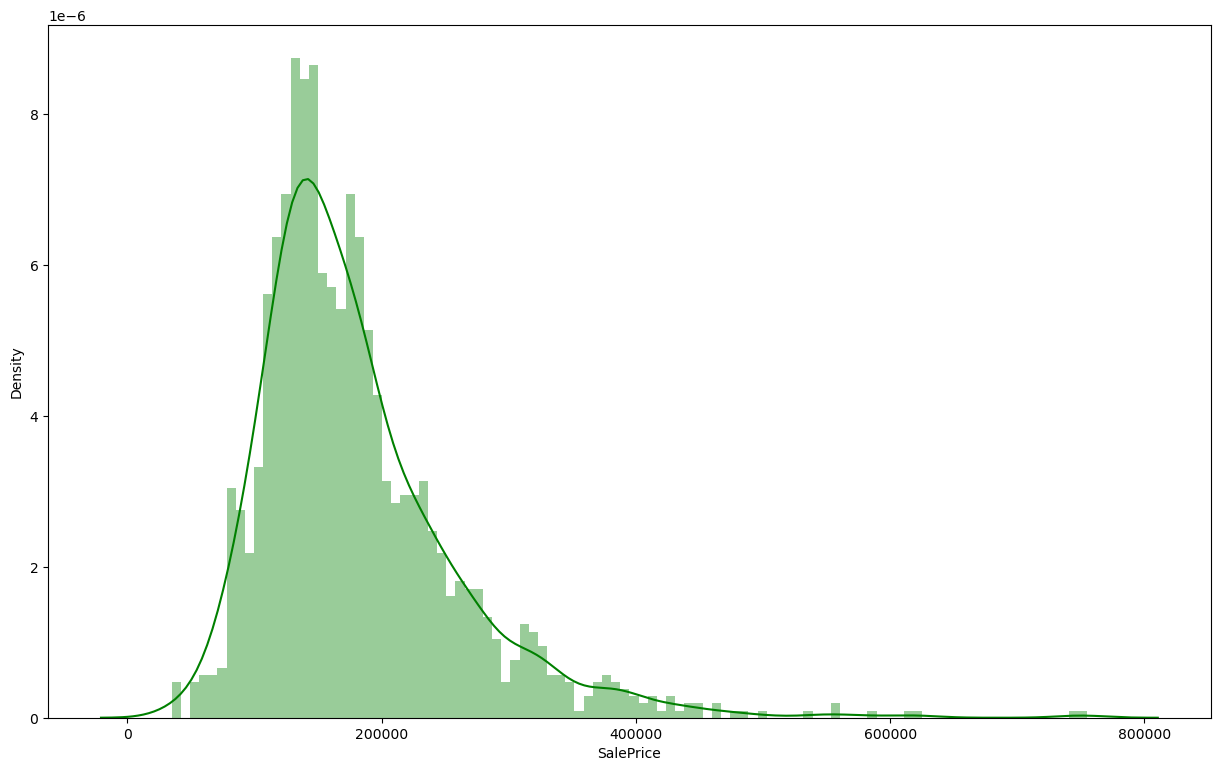

In [9]:
print(dataset_df['SalePrice'].describe())
plt.figure(figsize=(15,9))
sns.distplot(dataset_df['SalePrice'],color='g',bins=100,hist_kws={'alpha':0.4})

### **Function of this⬆️ code block:** 
this line creates a distribution plot for the 'SalePrice' column of the `dataset_df` DataFrame, with a green color, divided into 100 bins, and with a histogram that is partially transparent. This kind of plot is typically used in data analysis to understand the distribution of a variable - for example, to see if it's normally distributed, skewed, has any outliers, etc.

### Explanation
`hist_kws={'alpha':0.4}`: This is a dictionary of additional keyword arguments passed to the underlying histogram plotting function. Here, it sets the `alpha` parameter, which controls the transparency of the histogram. An `alpha` value of 0.4 implies that the histogram bars will be 40% opaque (or 60% transparent). This can be useful for seeing the underlying grid or if there are overlapping bars.



## Numerical data distribution
We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of data from our dataset and select only the numerical ones.

In [10]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [11]:
df_num = dataset_df.select_dtypes(include = ['float64','int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Now let us plot the distribution for all the numerical features.

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

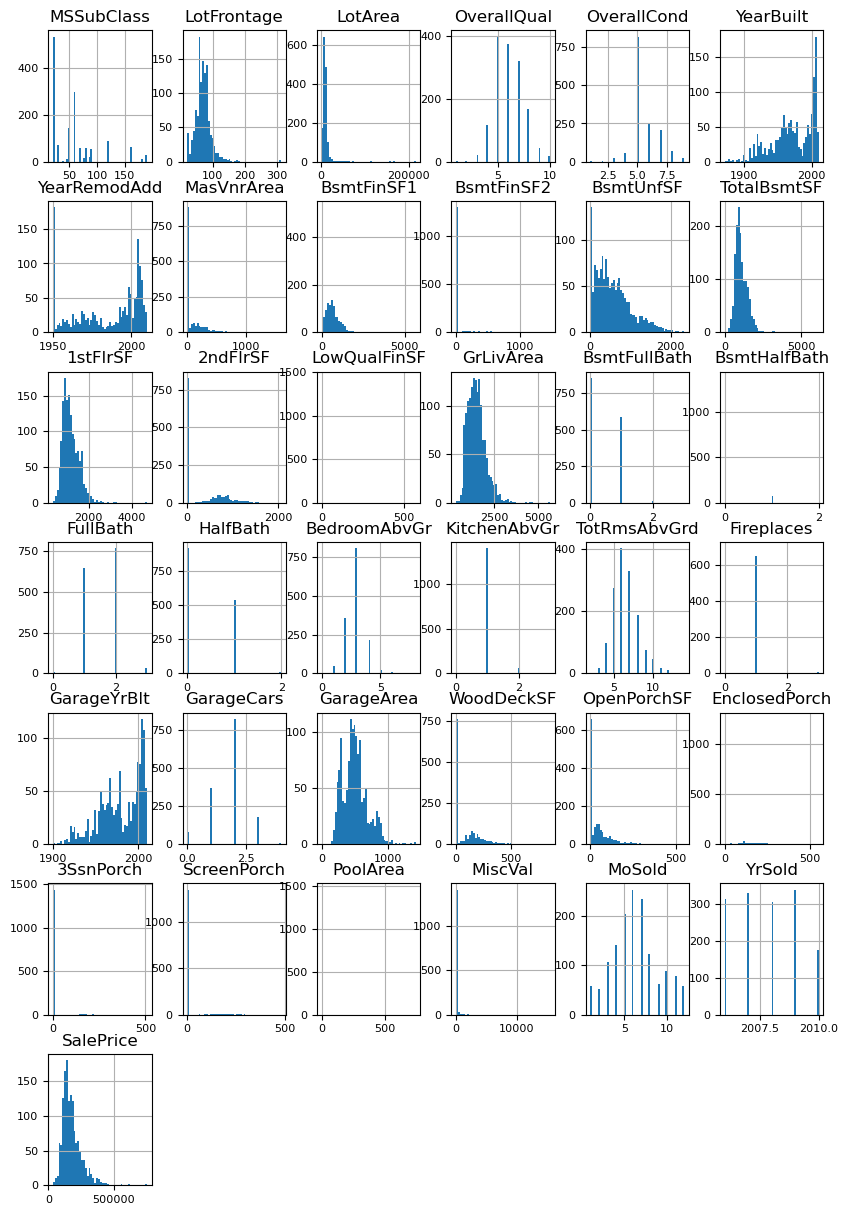

In [12]:
df_num.hist(figsize=(10,15),bins=50,xlabelsize=8,ylabelsize=8)

## Prepare the dataset
This dataset contains a mix of numeric, categorical and missing features. TF-DF supports all these feature types natively, and no preprocessing is required. This is one advantage of tree-based models, making them a great entry point to Tensorflow and ML.

Now let us split the dataset into training and testing datasets:

In [17]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1026 examples in training, 434 examples in testing.


In [18]:
label = 'SalePrice'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

## Select a Model
There are several tree-based models for you to choose from.

* RandomForestModel
* GradientBoostedTreesModel
* CartModel
* DistributedGradientBoostedTreesModel
To start, we'll work with a Random Forest. This is the most well-known of the Decision Forest training algorithms.

A Random Forest is a collection of decision trees, each trained independently on a random subset of the training dataset (sampled with replacement). The algorithm is unique in that it is robust to overfitting, and easy to use.

In [19]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [25]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mae"])# Optional, you can use this to include a list of eval metrics

Use /var/folders/k0/sqlrb6tx7w77mv29j7333kyh0000gq/T/tmphmag_esc as temporary training directory


## Train the model

We will train the model using a one-liner.

Note: you may see a warning about Autograph. You can safely ignore this, it will be fixed in the next release.

In [26]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:01.051983. Found 1026 examples.
Training model...


[INFO 24-01-22 10:22:28.3237 HKT kernel.cc:1233] Loading model from path /var/folders/k0/sqlrb6tx7w77mv29j7333kyh0000gq/T/tmphmag_esc/model/ with prefix 6243b08f3edc4c7a


Model trained in 0:00:00.932248
Compiling model...


[INFO 24-01-22 10:22:28.5247 HKT decision_forest.cc:660] Model loaded with 300 root(s), 97550 node(s), and 74 input feature(s).
[INFO 24-01-22 10:22:28.5248 HKT abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-01-22 10:22:28.5248 HKT kernel.cc:1061] Use fast generic engine


Model compiled.


In [27]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

## Evaluate the model on the Out of bag (OOB) data and the validation dataset

Before training the dataset we have manually seperated 20% of the dataset for validation named as valid_ds.

We can also use Out of bag (OOB) score to validate our RandomForestModel. To train a Random Forest Model, a set of random samples from training set are choosen by the algorithm and the rest of the samples are used to finetune the model.The subset of data that is not chosen is known as Out of bag data (OOB). OOB score is computed on the OOB data.

Read more about OOB data [here](https://developers.google.com/machine-learning/decision-forests/out-of-bag).

The training logs show the Root Mean Squared Error (RMSE) evaluated on the out-of-bag dataset according to the number of trees in the model. Let us plot this.

Note: Smaller values are better for this hyperparameter.

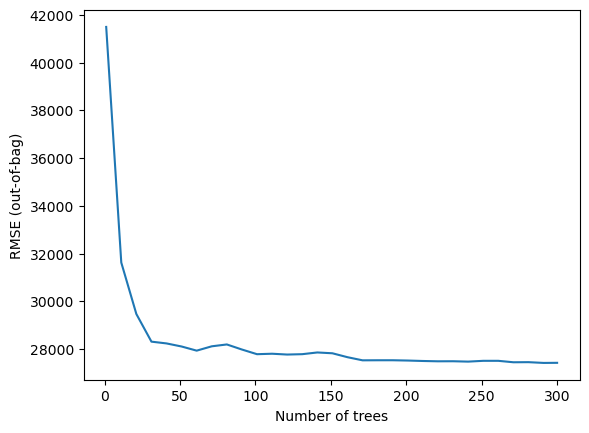

In [28]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

We can also thee some general stats on the OOB dataset:

In [31]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1026, accuracy=None, loss=None, rmse=27421.154054786075, ndcg=None, aucs=None, auuc=None, qini=None)

In [32]:
logs

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=386, accuracy=None, loss=None, rmse=41491.56105460801, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=1021, accuracy=None, loss=None, rmse=31621.168911094548, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=1026, accuracy=None, loss=None, rmse=29465.132260555292, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=1026, accuracy=None, loss=None, rmse=28307.899844660238, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=1026, accuracy=None, loss=None, rmse=28233.72357678457, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=1026, accuracy=None, loss=None, rmse=28104.58939191414, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=61, evaluatio

In [33]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name,value  in evaluation.items():
    print(f"{name}:{value:.4f}")

1/1 [==============================] - 0s 221ms/step - loss: 0.0000e+00 - mae: 16454.1328
loss:0.0000
mae:16454.1328


## Variable importances

Variable importances generally indicate how much a feature contributes to the model predictions or quality. There are several ways to identify important features using TensorFlow Decision Forests. Let us list the available `Variable Importances` for `Decision Trees`:

In [34]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
    print("\t",importance)

Available variable importances:
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT
	 NUM_NODES


这段代码的输出显示了一个模型（可能是随机森林或其他类似的树形模型）中的可用变量重要性指标。这些指标是对模型中不同特征影响力的量化衡量。具体来说：

1. **INV_MEAN_MIN_DEPTH**：这可能指的是特征在树中分割点的平均最小深度的倒数。如果一个特征在树的更浅层被用来分割数据，它通常被认为对预测目标变量更重要。这个指标可能是表示该特征对模型的整体影响力，深度越浅，影响力越大。

2. **NUM_AS_ROOT**：这表示特征作为根节点（树的最顶部节点）的次数。如果一个特征经常被用作根节点，这意味着它在数据分割中起着关键作用，对预测目标变量的影响很大。

3. **SUM_SCORE**：这可能是指特征在所有树中分割点的重要性得分的总和。这个得分通常基于特征在分割点上对减少不纯度或提高预测准确率的贡献。得分越高，特征越重要。

4. **NUM_NODES**：这代表特征被用作分割节点的总次数。一个特征被频繁用来分割数据，说明它对于模型区分不同类别或预测结果非常有效。

每种变量重要性指标都从不同角度提供了关于特征对模型影响力的信息，可以帮助你理解模型是如何做出预测的，以及哪些特征对预测结果最为重要。这对于模型解释、特征工程以及数据收集策略的制定都非常有用。


As an example, let us display the important features for the Variable Importance `NUM_AS_ROOT`.

The larger the importance score for `NUM_AS_ROOT`, the more impact it has on the outcome of the model.

By default, the list is sorted from the most important to the least. From the output you can infer that the feature at the top of the list is used as the root node in most number of trees in the random forest than any other feature.

In [35]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 109.0),
 ("ExterQual" (4; #22), 56.0),
 ("Neighborhood" (4; #59), 42.0),
 ("GarageCars" (1; #32), 26.0),
 ("BsmtQual" (4; #14), 13.0),
 ("GrLivArea" (1; #38), 13.0),
 ("YearBuilt" (1; #76), 11.0),
 ("KitchenQual" (4; #44), 10.0),
 ("GarageArea" (1; #31), 9.0),
 ("TotalBsmtSF" (1; #73), 6.0),
 ("1stFlrSF" (1; #0), 2.0),
 ("FullBath" (1; #29), 2.0),
 ("GarageYrBlt" (1; #37), 1.0)]

Plot the variable importances from the inspector using Matplotlib

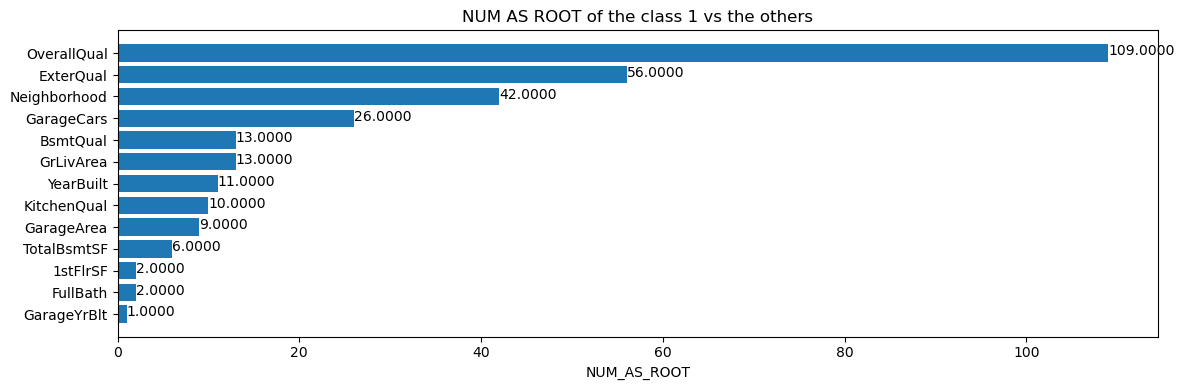

In [43]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC fo the calss 1 vs the others
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values
# 
# `variable_importances` is a list of <feature, importance> tuples.

feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]

# The feature are ordered in decreasing importance value

feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [44]:
test_file_path = "./test.csv"
test_data = pd.read_csv(test_file_path)
ids = test_data.pop('Id')

test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': preds.squeeze()})

output.head()

2/2 [==============================] - 0s 19ms/step


,Id,SalePrice
0,1461,125370.062500
1,1462,152941.015625
2,1463,178376.484375
3,1464,183081.812500
4,1465,196021.000000


In [45]:
my_submission_df_TFDF = pd.read_csv('./sample_submission.csv')
my_submission_df_TFDF['SalePrice'] = rf.predict(test_ds)
my_submission_df_TFDF.to_csv('./mysubmission_TFDF.csv', index=False)
my_submission_df_TFDF.head()

2/2 [==============================] - 0s 19ms/step


,Id,SalePrice
0,1461,125370.062500
1,1462,152941.015625
2,1463,178376.484375
3,1464,183081.812500
4,1465,196021.000000
